In [2]:
import pandas as pd

In [3]:
modisco_hits = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/peaks/modisco_in_peaks.bed", sep="\t", header=None)




In [4]:
chip_regions = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/peaks/tf_chip_in_peaks.bed", sep="\t", header=None)


In [5]:
chip_regions.head()

,0,1,2,3,4,5,6,7
0,chr1,778681,778701,ARID3A,chr1,777903,779619,20
1,chr1,870040,870060,ARID3A,chr1,869404,870658,20
2,chr1,904768,904788,ARID3A,chr1,903978,905930,20
3,chr1,940412,940432,ARID3A,chr1,939966,943147,20
4,chr1,960690,960710,ARID3A,chr1,958767,961066,20


In [6]:
modisco_hits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr1,181861,181874,0_1_CTCF_MA0139.1,-,9.601863,1,4.283203,1,0.005518,chr1,180994,181994,13
1,chr1,181863,181876,0_1_CTCF_MA0139.1,+,3.305141,1,4.061063,1,0.004188,chr1,180994,181994,13
2,chr1,267989,268009,0_35_BATF+JUN_MA0462.1,+,-0.182324,2,6.837617,2,0.006156,chr1,267512,268512,20
3,chr1,267997,268018,0_33_IRF4_HUMAN.H11MO.0.A,+,4.137696,2,13.064201,2,0.011893,chr1,267512,268512,21
4,chr1,267999,268012,0_1_CTCF_MA0139.1,-,4.803769,2,14.834117,2,0.029767,chr1,267512,268512,13


In [7]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [8]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [9]:
import numpy as np

def get_motif_chip_count_matrix(chip, modisco, chip_intersect_mat):
    idx=0
 
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    
    for td_i in unique_motifs:
        temp = chip_intersect_mat[chip_intersect_mat[3]==td_i]

        alltfs = temp.loc[:,13].values

        for tf_i in range(len(uniq_tfs)):
            if uniq_tfs[tf_i] in alltfs:
                motifs_to_chip[idx,tf_i] = np.sum(alltfs==uniq_tfs[tf_i])
        idx+=1
    
    return motifs_to_chip,unique_motifs,uniq_tfs
        
#motif_chip_count_matrix,unique_motifs,uniq_tfs = get_motif_chip_count_matrix(chip_regions, modisco_hits,chip_intersect)


In [10]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/09_06_2022_motif_scanning/mooods_run/merged.k562.bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

202609839

In [11]:
modisco_chip = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/peaks/modisco_chip.intersect", header=None, sep="\t")
modisco_chip.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,chr1,181861,181874,0_1_CTCF_MA0139.1,-,9.601863,1.0,4.283203,1.0,0.005518,...,13.0,.,-1.0,-1.0,.,.,.,.,.,0.0
1,chr1,181863,181876,0_1_CTCF_MA0139.1,+,3.305141,1.0,4.061063,1.0,0.004188,...,13.0,.,-1.0,-1.0,.,.,.,.,.,0.0
2,chr1,267989,268009,0_35_BATF+JUN_MA0462.1,+,-0.182324,2.0,6.837617,2.0,0.006156,...,20.0,chr1,267993.0,268032.0,CTCF,chr1,267512,268512,39,16.0
3,chr1,267989,268009,0_35_BATF+JUN_MA0462.1,+,-0.182324,2.0,6.837617,2.0,0.006156,...,20.0,chr1,267994.0,268031.0,RAD21,chr1,267512,268512,37,15.0
4,chr1,267989,268009,0_35_BATF+JUN_MA0462.1,+,-0.182324,2.0,6.837617,2.0,0.006156,...,20.0,chr1,267995.0,268015.0,RUNX3,chr1,267512,268512,20,14.0


In [12]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,modisco_chip_intersect,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a","temp_merged.bed", "-b", "temp1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp2 = modisco_chip_intersect[(modisco_chip_intersect[3]==unique_motifs[i])]
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp")
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp3")
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,modisco_chip,total_bases)



39 152
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


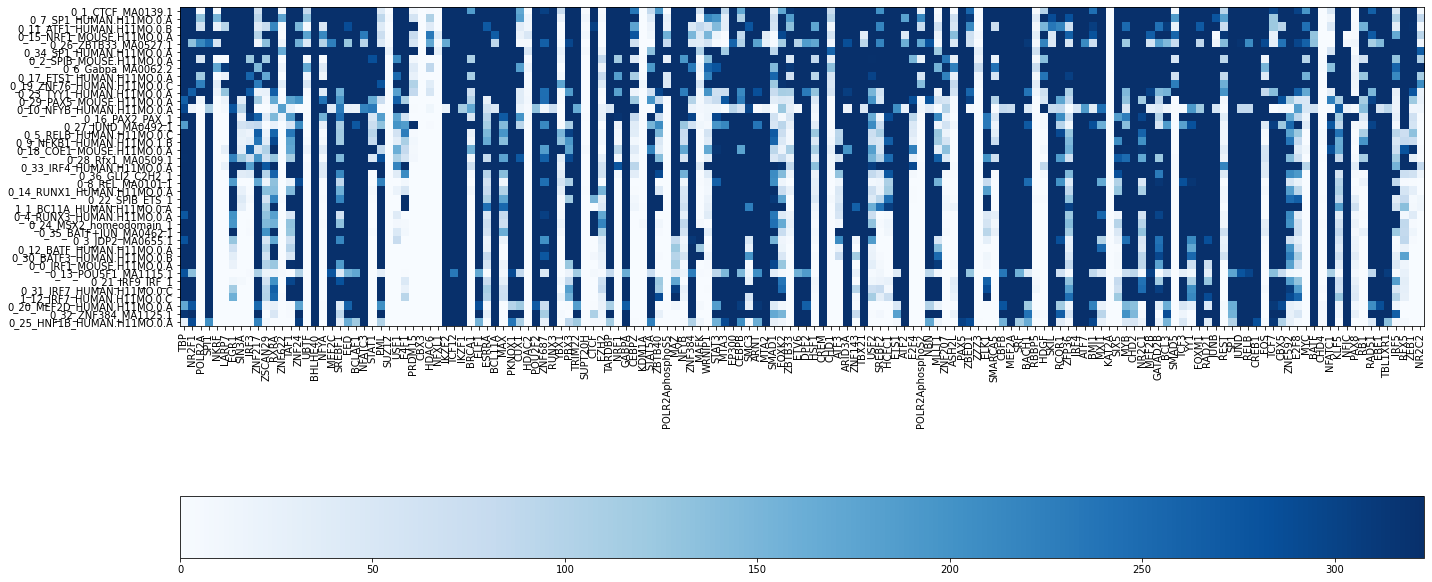

In [13]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [14]:
unique_motifs

from statsmodels.sandbox.stats.multicomp import multipletests


0_0_IRF1_MOUSE.H11MO.0.A
0_1_CTCF_MA0139.1
0_2_SPIB_MOUSE.H11MO.0.A
0_3_JDP2_MA0655.1
0_4_RUNX3_HUMAN.H11MO.0.A
0_5_RELB_HUMAN.H11MO.0.C
0_6_Gabpa_MA0062.2
0_7_SP1_HUMAN.H11MO.0.A
0_8_REL_MA0101.1
0_9_NFKB1_HUMAN.H11MO.1.B
0_10_NFYB_HUMAN.H11MO.0.A
0_11_ATF1_HUMAN.H11MO.0.B
0_12_BATF_HUMAN.H11MO.0.A
0_13_POU5F1_MA1115.1
0_14_RUNX1_HUMAN.H11MO.0.A
0_15_NRF1_MOUSE.H11MO.0.A
0_16_PAX2_PAX_1
0_17_ETS1_HUMAN.H11MO.0.A
0_18_COE1_MOUSE.H11MO.0.A
0_19_ZNF76_HUMAN.H11MO.0.C
0_20_MEF2D_HUMAN.H11MO.0.A
0_21_IRF9_IRF_1
0_22_SPIB_ETS_1
0_23_TYY1_HUMAN.H11MO.0.A
0_24_MSX2_homeodomain_1


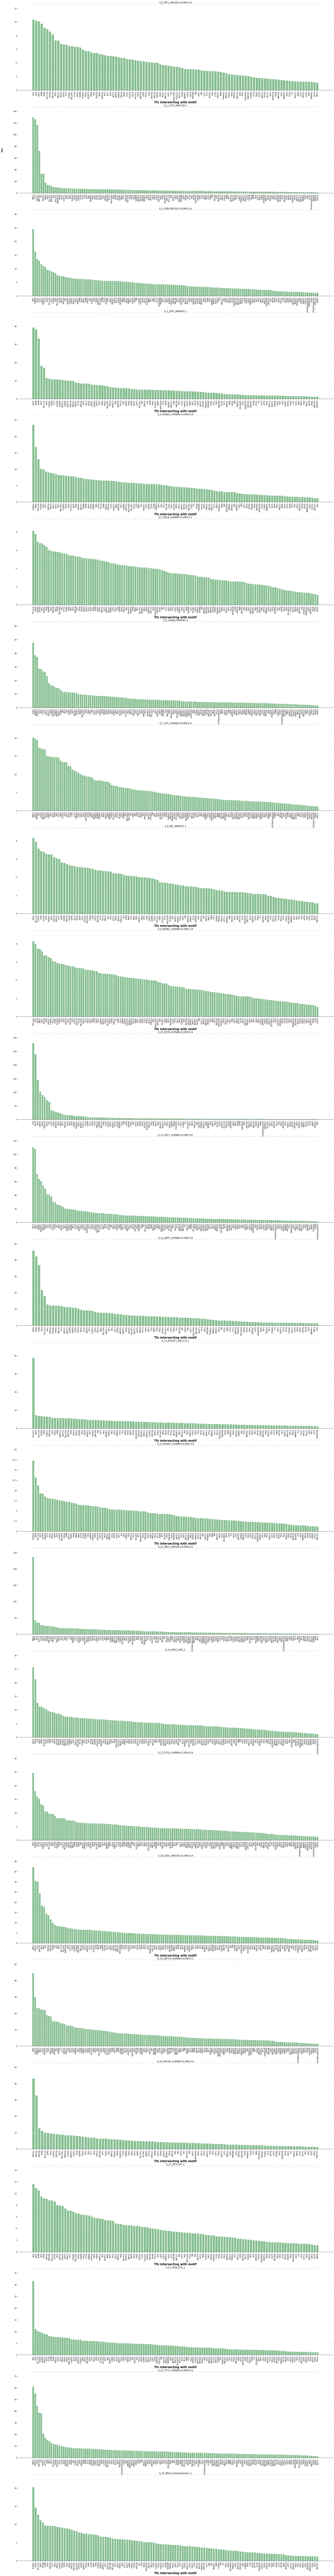

<Figure size 432x288 with 0 Axes>

In [15]:
fig, axs = plt.subplots(25,figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(25):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    #print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][-5:])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
plt.show()
plt.tight_layout()

In [16]:
motif_chip_pval_matrix[1,:]

array([4.94065646e-324, 4.94065646e-324, 1.00000000e+000, 4.94065646e-324,
       9.99999751e-001, 4.94065646e-324, 4.94065646e-324, 4.94065646e-324,
       4.94065646e-324, 8.10170603e-068, 4.94065646e-324, 4.94065646e-324,
       7.82768974e-015, 4.94065646e-324, 4.94065646e-324, 3.70243232e-085,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324, 4.94065646e-324,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324, 4.94065646e-324,
       2.63666723e-042, 9.99999783e-001, 4.94065646e-324, 4.94065646e-324,
       3.44441082e-011, 1.00000000e+000, 5.00954921e-004, 1.00000000e+000,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324, 6.22963804e-187,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324, 4.94065646e-324,
       4.94065646e-324, 3.51195674e-170, 7.65822650e-002, 4.94065646e-324,
       9.60560681e-303, 4.94065646e-324, 6.92556319e-078, 4.94065646e-324,
       4.94065646e-324, 9.17118022e-004, 4.94065646e-324, 3.30316252e-004,
       4.94065646e-324, 4

In [17]:
unique_motifs

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_5_RELB_HUMAN.H11MO.0.C',
 '0_6_Gabpa_MA0062.2',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_8_REL_MA0101.1',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_10_NFYB_HUMAN.H11MO.0.A',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_14_RUNX1_HUMAN.H11MO.0.A',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_16_PAX2_PAX_1',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_20_MEF2D_HUMAN.H11MO.0.A',
 '0_21_IRF9_IRF_1',
 '0_22_SPIB_ETS_1',
 '0_23_TYY1_HUMAN.H11MO.0.A',
 '0_24_MSX2_homeodomain_1',
 '0_25_HNF1B_HUMAN.H11MO.0.A',
 '0_26_ZBTB33_MA0527.1',
 '0_27_JUND_MA0492.1',
 '0_28_Rfx1_MA0509.1',
 '0_29_PAX5_MOUSE.H11MO.0.A',
 '0_30_BATF3_HUMAN.H11MO.0.B',
 '0_31_IRF7_HUMAN.H11MO.0.C',
 '0_32_ZNF384_MA1125.1',
 '0_33_IRF4_HUMAN.H11MO.0.A',
 '0_34_SP1_HUMAN.H11MO.0.A',
 '0_35_BATF+JUN_MA0462.1',
 '0_36_GLI2_C2H2_

In [18]:
data={}
data["pval"] = motif_chip_pval_matrix
data["odds"] = odds_ratio
data["motif_names"] = unique_motifs
data["tf_names"] = uniq_tfs

#import pickle as pkl
#ft = open("saving_pvals.pkl","wb")
#pkl.dump(data,ft)